In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_dev = x_train[-10000:]
y_dev = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_dev = np_utils.to_categorical(y_dev, 10)

x_train = x_train / 255.0
x_dev = x_dev / 255.0
x_test = x_test / 255.0

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3340 - accuracy: 0.9282 - val_loss: 0.2040 - val_accuracy: 0.9648
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1732 - accuracy: 0.9717 - val_loss: 0.1562 - val_accuracy: 0.9760
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1369 - accuracy: 0.9807 - val_loss: 0.1583 - val_accuracy: 0.9731
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1170 - accuracy: 0.9843 - val_loss: 0.1657 - val_accuracy: 0.9707
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9873 - val_loss: 0.1368 - val_accuracy: 0.9780
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0934 - accuracy: 0.9898 - val_loss: 0.1381 - val_accuracy: 0.9772
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9901 - val_loss: 0.1363 - val_accuracy: 0.9762
Epoch 

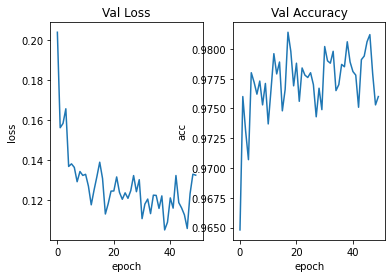

313/313 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9760
test loss: 0.12476696819067001
test accuracy: 0.9760000109672546


In [2]:
# 1
# L2 regularization, Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.2728 - accuracy: 0.9166 - val_loss: 0.1164 - val_accuracy: 0.9651
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.1095 - accuracy: 0.9662 - val_loss: 0.0858 - val_accuracy: 0.9756
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0782 - accuracy: 0.9758 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0760 - val_accuracy: 0.9783
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0707 - val_accuracy: 0.9792
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0825 - val_accuracy: 0.9771
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0841 - val_accuracy: 0.9794
Epoch 

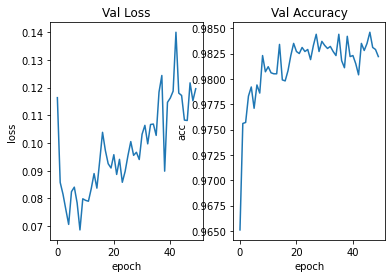

313/313 [==============================] - 0s 630us/step - loss: 0.1069 - accuracy: 0.9839
test loss: 0.10693424195051193
test accuracy: 0.9839000105857849


In [3]:
# 2
# Dropout regularization(0.2), Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
387/391 [============================>.] - ETA: 0s - loss: 0.2488 - accuracy: 0.9266
Epoch 1: val_loss improved from inf to 0.11090, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.2477 - accuracy: 0.9269 - val_loss: 0.1109 - val_accuracy: 0.9678
Epoch 2/50
381/391 [============================>.] - ETA: 0s - loss: 0.0904 - accuracy: 0.9722
Epoch 2: val_loss improved from 0.11090 to 0.08572, saving model to best_model.h5
391/391 [==============================] - 1s 4ms/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0857 - val_accuracy: 0.9744
Epoch 3/50
381/391 [============================>.] - ETA: 0s - loss: 0.0547 - accuracy: 0.9821
Epoch 3: val_loss did not improve from 0.08572
391/391 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9819 - val_loss: 0.0987 - val_accuracy: 0.9715
Epoch 4/50
379/391 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9879
Epoch 4: val_los

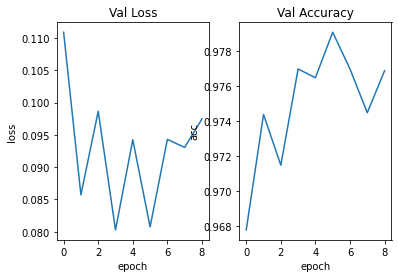

313/313 [==============================] - 0s 629us/step - loss: 0.0781 - accuracy: 0.9771
best test model loss:  0.07811543345451355
best test model accuracy:  0.9771000146865845


In [4]:
# 3
# Early stopping(patience=5), adam optimizer

batchSize = 128
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 0.2871 - accuracy: 0.9424 - val_loss: 0.2115 - val_accuracy: 0.9649
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1657 - accuracy: 0.9773 - val_loss: 0.2061 - val_accuracy: 0.9638
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1376 - accuracy: 0.9832 - val_loss: 0.1959 - val_accuracy: 0.9694
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1278 - accuracy: 0.9847 - val_loss: 0.1869 - val_accuracy: 0.9691
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1170 - accuracy: 0.9868 - val_loss: 0.1694 - val_accuracy: 0.9761
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1119 - accuracy: 0.9884 - val_loss: 0.1706 - val_accuracy: 0.9750
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1114 - accuracy: 0.9873 - val_loss: 0.1800 - val_accuracy: 0.9727
Epoch 

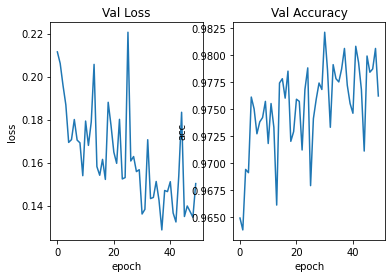

313/313 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9749
test loss: 0.15570618212223053
test accuracy: 0.9749000072479248


In [5]:
# 4
# L2 regularization, batch norm, adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 0.3888 - accuracy: 0.9147 - val_loss: 0.2309 - val_accuracy: 0.9587
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 0.1912 - accuracy: 0.9684 - val_loss: 0.1724 - val_accuracy: 0.9745
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 0.1512 - accuracy: 0.9789 - val_loss: 0.1579 - val_accuracy: 0.9754
Epoch 4/50
196/196 [==============================] - 1s 7ms/step - loss: 0.1250 - accuracy: 0.9846 - val_loss: 0.1463 - val_accuracy: 0.9785
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1067 - accuracy: 0.9887 - val_loss: 0.1364 - val_accuracy: 0.9798
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0960 - accuracy: 0.9904 - val_loss: 0.1313 - val_accuracy: 0.9796
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0851 - accuracy: 0.9927 - val_loss: 0.1250 - val_accuracy: 0.9801
Epoch 

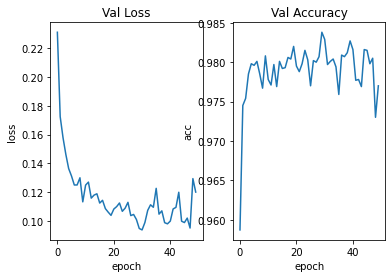

313/313 [==============================] - 0s 992us/step - loss: 0.1242 - accuracy: 0.9751
test loss: 0.12422044575214386
test accuracy: 0.9750999808311462


In [6]:
# 5
# L2 regularization, Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 0.3234 - accuracy: 0.9040 - val_loss: 0.1294 - val_accuracy: 0.9629
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0836 - accuracy: 0.9745 - val_loss: 0.0844 - val_accuracy: 0.9755
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0748 - val_accuracy: 0.9774
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0499 - accuracy: 0.9838 - val_loss: 0.0701 - val_accuracy: 0.9800
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0755 - val_accuracy: 0.9771
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0758 - val_accuracy: 0.9792
Epoch 

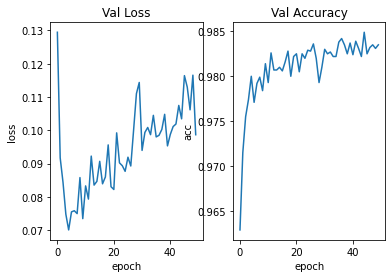

313/313 [==============================] - 0s 710us/step - loss: 0.0866 - accuracy: 0.9850
test loss: 0.08655644208192825
test accuracy: 0.9850000143051147


In [7]:
# 6
# Dropout regularization(0.2), Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
188/196 [===========================>..] - ETA: 0s - loss: 0.2986 - accuracy: 0.9123
Epoch 1: val_loss improved from inf to 0.12609, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.2927 - accuracy: 0.9141 - val_loss: 0.1261 - val_accuracy: 0.9648
Epoch 2/50
186/196 [===========================>..] - ETA: 0s - loss: 0.1039 - accuracy: 0.9691
Epoch 2: val_loss improved from 0.12609 to 0.10146, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.1032 - accuracy: 0.9692 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 3/50
186/196 [===========================>..] - ETA: 0s - loss: 0.0634 - accuracy: 0.9807
Epoch 3: val_loss improved from 0.10146 to 0.08843, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0884 - val_accuracy: 0.9728
Epoch 4/50
193/196 [============================>.] - ETA: 0s - loss: 0.0405 

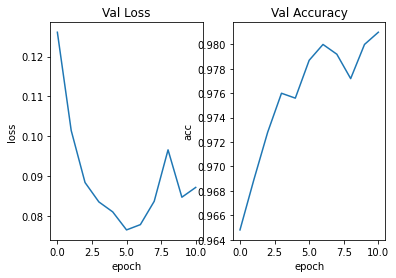

313/313 [==============================] - 0s 678us/step - loss: 0.0692 - accuracy: 0.9786
best test model loss:  0.06919712573289871
best test model accuracy:  0.978600025177002


In [8]:
# 7
# Early stopping(patience=5), adam optimizer

batchSize = 256
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
196/196 [==============================] - 2s 8ms/step - loss: 0.2983 - accuracy: 0.9394 - val_loss: 0.3483 - val_accuracy: 0.9548
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1539 - accuracy: 0.9814 - val_loss: 0.1882 - val_accuracy: 0.9716
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1260 - accuracy: 0.9875 - val_loss: 0.1718 - val_accuracy: 0.9757
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1091 - accuracy: 0.9911 - val_loss: 0.1997 - val_accuracy: 0.9669
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1039 - accuracy: 0.9910 - val_loss: 0.1630 - val_accuracy: 0.9763
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1033 - accuracy: 0.9902 - val_loss: 0.1808 - val_accuracy: 0.9714
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0933 - accuracy: 0.9926 - val_loss: 0.1714 - val_accuracy: 0.9738
Epoch 

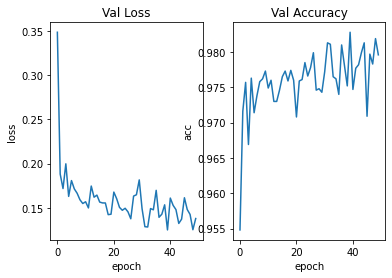

313/313 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9787
test loss: 0.13330774009227753
test accuracy: 0.9786999821662903


In [9]:
# 8
# L2 regularization, batch norm, adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 2.0529 - accuracy: 0.5403 - val_loss: 1.6307 - val_accuracy: 0.7554
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3192 - accuracy: 0.7772 - val_loss: 1.0147 - val_accuracy: 0.8405
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.9109 - accuracy: 0.8326 - val_loss: 0.7543 - val_accuracy: 0.8684
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.7357 - accuracy: 0.8563 - val_loss: 0.6351 - val_accuracy: 0.8845
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.6460 - accuracy: 0.8709 - val_loss: 0.5695 - val_accuracy: 0.8930
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5918 - accuracy: 0.8797 - val_loss: 0.5283 - val_accuracy: 0.9006
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5552 - accuracy: 0.8860 - val_loss: 0.4998 - val_accuracy: 0.9053
Epoch 

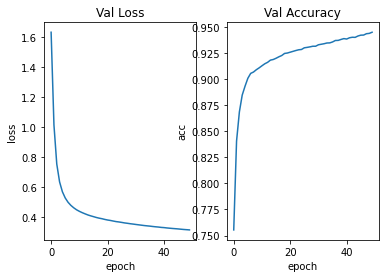

313/313 [==============================] - 0s 943us/step - loss: 0.3217 - accuracy: 0.9410
test loss: 0.321682333946228
test accuracy: 0.9409999847412109


In [11]:
# 9
# L2 regularization, Adagrad optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adagrad(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3466 - accuracy: 0.7300 - val_loss: 0.6937 - val_accuracy: 0.8739
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.6160 - accuracy: 0.8738 - val_loss: 0.5023 - val_accuracy: 0.8992
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5043 - accuracy: 0.8945 - val_loss: 0.4475 - val_accuracy: 0.9079
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4579 - accuracy: 0.9041 - val_loss: 0.4161 - val_accuracy: 0.9177
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4292 - accuracy: 0.9113 - val_loss: 0.3964 - val_accuracy: 0.9209
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4088 - accuracy: 0.9164 - val_loss: 0.3801 - val_accuracy: 0.9249
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3924 - accuracy: 0.9212 - val_loss: 0.3679 - val_accuracy: 0.9293
Epoch 

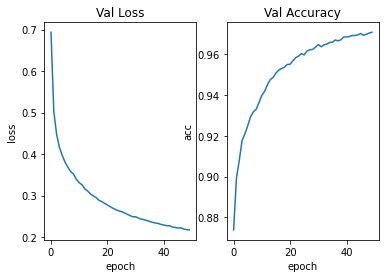

313/313 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9699
test loss: 0.21234172582626343
test accuracy: 0.9699000120162964


In [13]:
# 10
# L2 regularization, Stochastic gradient descent optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3334 - accuracy: 0.9229 - val_loss: 0.1800 - val_accuracy: 0.9691
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 0.1681 - accuracy: 0.9707 - val_loss: 0.1864 - val_accuracy: 0.9648
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.1290 - accuracy: 0.9785 - val_loss: 0.1580 - val_accuracy: 0.9679
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 0.1069 - accuracy: 0.9825 - val_loss: 0.1261 - val_accuracy: 0.9759
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.0938 - accuracy: 0.9848 - val_loss: 0.1347 - val_accuracy: 0.9743
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.0830 - accuracy: 0.9871 - val_loss: 0.1249 - val_accuracy: 0.9785
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.0767 - accuracy: 0.9882 - val_loss: 0.1220 - val_accuracy: 0.9767
Epoch 

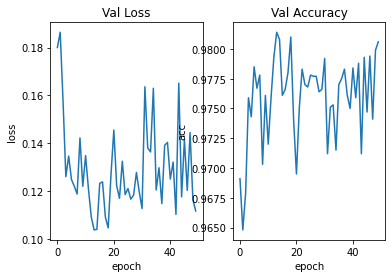

313/313 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9786
test loss: 0.11365251243114471
test accuracy: 0.978600025177002


In [14]:
# 11
# L2 regularization, RMS prop optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)